## AST Project 1
### Collaborators: 'Oswald, Emma Jo', 'Kho, Jonathan Andrew', 'Andalib, Arian Alexander', 'Stone, Ashley Taylor'
### Michigan State University
### AST 304

In [1]:
########################################################################
# Team Spectacular Stellars: 'Oswald, Emma Jo', 'Kho, Jonathan Andrew', 'Andalib, Arian Alexander', 'Stone, Ashley Taylor'
# AST 304, Fall 2022
# Michigan State University
########################################################################

# The libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline


### <u> _Problems and the Results:_

##### 1. Implement routines that advance the solution to a system of ODE’s by one step h for the forward Euler, second-order Runge-Kutta, and fourth3 AST 304 Group Computational Project  order Runge-Kutta. The partially completed routines are in the file ode.py in your project repository. Once you have the routines written, you will need to test them. The file test_ode.py. This test integrates the simpler system of equations
$$z(t = 0) = {0.0, 1.0}, \\ f(t, z, ω) = {\omega z1, −\omega z0} \\ (13) $$ 
##### for which you can verify that the solution is z(t) = {sin(ωt), cos(ωt)}. Run test_ode.py and compare the output of this test with the file sample_output. They should be close.

##### 2. Next, complete the functions in kepler.py that compute the kinetic, potential, and total energies, all per unit reduced mass, as well as the function
def derivs(t,z,m):
##### which computes dr/dt, dv/dt following eq. [7].

##### 3.  Also in the file kepler.py you will find a routine
 def integrate_orbit(z0,m,tend,h,method=’RK4’):
##### that integrates the equations of motion from 0 < t ≤ tend. Notice that this routine takes an optional parameter method with default value ’RK4’:if you call the routine with method=’Euler’ it will use the ode.f Euler method, and similarly for ’RK2’ and ’RK4’. This allows you to switch between integration methods without having to rewrite code. Finally,there is a routine
def set_initial_conditions(a, m, e):
##### that computes the initial position and velocity, as well as the energy and orbital period, given the semi-major axis, mass, and eccentricity.You will need to complete the routines in kepler.py, including the documentation.

##### 4. Write a python script that uses the functions in ode.py and kepler.py to do the following. For each of the three integration methods, integrate the equations of motion over 3 orbital periods, and compute the relative error in the total energy at the end of this time. Take the semi-major axis a = 1 and total mass m = 1. Make the ellipse have an eccentricity of e = 0.5 so that x0 = (1 + e)a = 1.5a. Do each integration for a range of step sizes h =h0, h0/2, h0/4, . . . h0/1024, where h0 = 0.1 T with T being the expected orbital period. Plot the error in the energy as a function of h. Does it scale as expected? Is it better to use linear or logarithmic axes in plotting the error?

In [1]:
from ode import * # fEuler, rk2, rk4
from kepler import * # kinetic_energy, potential_energy, total_energy, derivs, integrate_orbit, set_initial_conditions, integration_methods
import numpy as np
import matplotlib.pyplot as plt

# Initial setup
a = 1 # AU
m = 1 # Solar mass
e = 0.5 # Eccentricity
G = 6.6743*10**-11 # Gravitational constant

init, eps0, T = set_initial_conditions(a,m,e)

# Expected energy of the system
Energy = total_energy(init,m)

h0 = 0.1*T # T = expected orbital period

sizes = [2**x for x in range(0,11)]
steps = [h0/n for n in sizes]

In [3]:
# fEuler 

# List with position, velocity, energy, and times for all step sizes
Eulervals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='Euler')
    
    Eulervals.append([ts,Xs,Ys,KEs,PEs,TEs])

Text(0.5, 1.0, 'Relative Error in Energy vs. step size for Forward Euler')

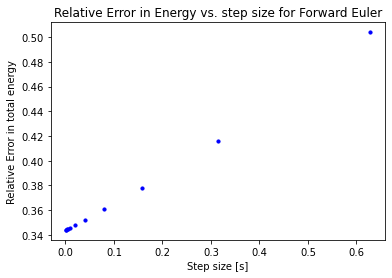

In [13]:
plt.scatter(steps[0],Eulervals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],Eulervals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],Eulervals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],Eulervals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],Eulervals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],Eulervals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],Eulervals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],Eulervals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],Eulervals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],Eulervals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],Eulervals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for Forward Euler')

In [14]:
# RK2

# List with position, velocity, energy, and times for all step sizes
RK2vals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='RK2')
    
    RK2vals.append([ts,Xs,Ys,KEs,PEs,TEs])

/Users/jkho/Documents/MSU Fall 2022/AST 304/AST-projecy-group-10/kepler.py:97: RuntimeWarning: overflow encountered in double_scalars
  ax = -m/r_current**3*norm_x
/Users/jkho/Documents/MSU Fall 2022/AST 304/AST-projecy-group-10/kepler.py:98: RuntimeWarning: overflow encountered in double_scalars
  ay = -m/r_current**3*norm_y
/Users/jkho/Documents/MSU Fall 2022/AST 304/AST-projecy-group-10/kepler.py:98: RuntimeWarning: invalid value encountered in double_scalars
  ay = -m/r_current**3*norm_y
/Users/jkho/Documents/MSU Fall 2022/AST 304/AST-projecy-group-10/kepler.py:97: RuntimeWarning: invalid value encountered in double_scalars
  ax = -m/r_current**3*norm_x


Text(0.5, 1.0, 'Relative Error in Energy vs. step size for RK2')

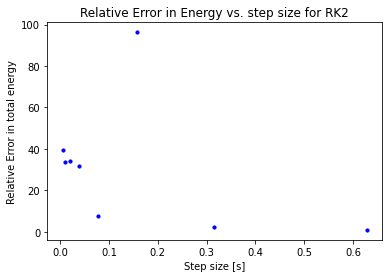

In [18]:
plt.scatter(steps[0],RK2vals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],RK2vals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],RK2vals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],RK2vals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],RK2vals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],RK2vals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],RK2vals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],RK2vals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],RK2vals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],RK2vals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],RK2vals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for RK2')

In [19]:
# RK4

# List with position, velocity, energy, and times for all step sizes
RK4vals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='RK4')
    
    RK4vals.append([ts,Xs,Ys,KEs,PEs,TEs])

Text(0.5, 1.0, 'Relative Error in Energy vs. step size for RK4')

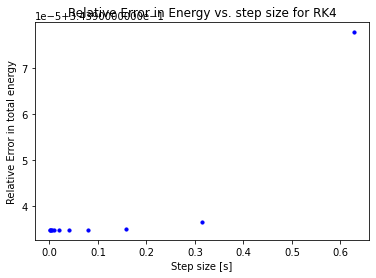

In [20]:
plt.scatter(steps[0],RK4vals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],RK4vals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],RK4vals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],RK4vals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],RK4vals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],RK4vals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],RK4vals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],RK4vals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],RK4vals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],RK4vals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],RK4vals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for RK4')

##### 5. For the smallest and largest values of h for each of the three integration methods, plot the particle trajectory. Does the orbit close? Is it an ellipse? Does it have the correct semi-major axis? Also plot the energies— potential, kinetic, and total—as a function of time. Put the energies all on the same plot.


In [ ]:
# Euler orbits

plt.subplot(121)
plt.plot(Eulervals[0][1],Eulervals[0][2])

plt.subplot(122)
plt.plot(Eulervals[10][1],Eulervals[10][2])

In [ ]:
# Euler energies

plt.plot(Eulervals[0][3],Eulervals[0][0],label = 'h0 KE')
plt.plot(Eulervals[0][4],Eulervals[0][2],label = 'h0 PE')
plt.plot(Eulervals[0][5],Eulervals[0][2],label = 'h0 TE')

plt.plot(Eulervals[10][3],Eulervals[10][0],label = 'h0/1024 KE')
plt.plot(Eulervals[10][4],Eulervals[10][2],label = 'h0/1024 PE')
plt.plot(Eulervals[10][5],Eulervals[10][2],label = 'h0/1024 TE')

In [ ]:
# RK2 orbits

plt.subplot(121)
plt.plot(RK2vals[0][1],RK2vals[0][2])

plt.subplot(122)
plt.plot(RK2vals[10][1],RK2vals[10][2])

In [ ]:
# RK2 energies

plt.plot(RK2vals[0][3],RK2vals[0][0],label = 'h0 KE')
plt.plot(RK2vals[0][4],RK2vals[0][2],label = 'h0 PE')
plt.plot(RK2vals[0][5],RK2vals[0][2],label = 'h0 TE')

plt.plot(RK2vals[10][3],RK2vals[10][0],label = 'h0/1024 KE')
plt.plot(RK2vals[10][4],RK2vals[10][2],label = 'h0/1024 PE')
plt.plot(RK2vals[10][5],RK2vals[10][2],label = 'h0/1024 TE')

In [ ]:
# RK4 orbits

plt.subplot(121)
plt.plot(RK4vals[0][1],RK4vals[0][2])

plt.subplot(122)
plt.plot(RK4vals[10][1],RK4vals[10][2])

In [ ]:
# RK4 energies

plt.plot(RK4vals[0][3],RK4vals[0][0],label = 'h0 KE')
plt.plot(RK4vals[0][4],RK4vals[0][2],label = 'h0 PE')
plt.plot(RK4vals[0][5],RK4vals[0][2],label = 'h0 TE')

plt.plot(RK4vals[10][3],RK4vals[10][0],label = 'h0/1024 KE')
plt.plot(RK4vals[10][4],RK4vals[10][2],label = 'h0/1024 PE')
plt.plot(RK4vals[10][5],RK4vals[10][2],label = 'h0/1024 TE')

### <u>_Discussion/Conclusion_



### <u>_Reference:_ 

(any reference material used for project)